In [1]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [2]:
# Read CSV files into Data Frames:
tripWeather = pd.read_csv('tripWeather.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [3]:
tripWeather.shape

(1120968, 47)

<b>Logical Integrity</b><br>
- Test 1: Check for Null Values by Column: <br>
&nbsp;- TENDERLOT: All values missing <br>
&nbsp;- sea_level: All values missing <br>
&nbsp;- grnd_level: All values missing <br>
&nbsp;- rain_3h: All values missing <br>
&nbsp;- snow_3h: All values missing <br>
&nbsp;- SUPPRESSED: 99.79% missing <br>
&nbsp;- JUSTIFICATIONID: 99.79% missing <br>
&nbsp;- snow_1h: 99.62% missing <br>
&nbsp;- wind_gust: 89.3% missing <br>
&nbsp;- rain_1h: 81.84% missing <br>
&nbsp;- ACTUALTIME_DEP: 7.6% missing <br>
&nbsp;- ACTUALTIME_ARR: 6.37% missing <br>
&nbsp;- visibility: .31% missing

In [4]:
tripWeather.isnull().sum()

DATASOURCE                   0
DAYOFSERVICE_x               0
TRIPID                       0
LINEID                       0
ROUTEID                      0
DIRECTION                    0
PLANNEDTIME_ARR              0
PLANNEDTIME_DEP              0
ACTUALTIME_ARR           71355
ACTUALTIME_DEP           85235
BASIN                        0
TENDERLOT              1120968
SUPPRESSED             1118580
JUSTIFICATIONID        1118582
LASTUPDATE                   0
NOTE                         0
planDep_time                 0
DOS_ID                       0
dt                           0
DAYOFSERVICE_y               0
timezonetext                 0
timezone                     0
city_name                    0
lat                          0
lon                          0
temp                         0
visibility                3499
dew_point                    0
feels_like                   0
temp_min                     0
temp_max                     0
pressure                     0
sea_leve

In [5]:
tripWeather.head()

,DATASOURCE,DAYOFSERVICE_x,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,DB,2/7/2018 0:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
1,DB,2/7/2018 0:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
2,DB,2/7/2018 0:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d
3,DB,2/7/2018 0:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,...,NaN,0.2,NaN,NaN,NaN,90,300,Drizzle,light intensity drizzle,09d
4,DB,2/7/2018 0:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,...,NaN,NaN,NaN,NaN,NaN,75,300,Drizzle,light intensity drizzle,09n


- Test 2: Check for unique count of DAYOFSERVICE from trip data: <br>
&nbsp;- Low count of unique suggests that all dates are at midnight, which is incorrect <br>

In [6]:
tripWeather.DAYOFSERVICE_x.nunique()

292

- Test 3: Check for unique count of DAYOFSERVICE from calculation of PLANNEDTIME_DEP and addition of trip data DAYOFSERVICE: <br>
&nbsp;- This is the date we should use moving forward. <br>

In [7]:
tripWeather.DAYOFSERVICE_y.nunique()

5934

- Test 4: Check for any future dates from DAYOFSERVICE_y: <br>
&nbsp;- All rows passed. <br>

In [8]:
tripWeather[['date', 'time']] = tripWeather.DAYOFSERVICE_y.str.split(' ', expand=True)
tripWeather.head()

,DATASOURCE,DAYOFSERVICE_x,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,...,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date,time
0,DB,2/7/2018 0:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,...,NaN,NaN,NaN,20,801,Clouds,few clouds,02n,2/7/2018,0:00
1,DB,2/7/2018 0:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,...,NaN,NaN,NaN,20,801,Clouds,few clouds,02n,2/7/2018,7:00
2,DB,2/7/2018 0:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,...,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d,2/7/2018,9:00
3,DB,2/7/2018 0:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,...,NaN,NaN,NaN,90,300,Drizzle,light intensity drizzle,09d,2/7/2018,15:00
4,DB,2/7/2018 0:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,...,NaN,NaN,NaN,75,300,Drizzle,light intensity drizzle,09n,2/7/2018,23:00


In [9]:
tripWeather[['month', 'day', 'year']] = tripWeather.date.str.split('/', expand=True)
tripWeather.head()

,DATASOURCE,DAYOFSERVICE_x,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,date,time,month,day,year
0,DB,2/7/2018 0:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,...,20,801,Clouds,few clouds,02n,2/7/2018,0:00,2,7,2018
1,DB,2/7/2018 0:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,...,20,801,Clouds,few clouds,02n,2/7/2018,7:00,2,7,2018
2,DB,2/7/2018 0:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,...,75,803,Clouds,broken clouds,04d,2/7/2018,9:00,2,7,2018
3,DB,2/7/2018 0:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,...,90,300,Drizzle,light intensity drizzle,09d,2/7/2018,15:00,2,7,2018
4,DB,2/7/2018 0:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,...,75,300,Drizzle,light intensity drizzle,09n,2/7/2018,23:00,2,7,2018


In [10]:
tripWeather[['hour', 'minute']] = tripWeather.time.str.split(':', expand=True)
tripWeather.head()

,DATASOURCE,DAYOFSERVICE_x,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,...,weather_main,weather_description,weather_icon,date,time,month,day,year,hour,minute
0,DB,2/7/2018 0:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,...,Clouds,few clouds,02n,2/7/2018,0:00,2,7,2018,0,00
1,DB,2/7/2018 0:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,...,Clouds,few clouds,02n,2/7/2018,7:00,2,7,2018,7,00
2,DB,2/7/2018 0:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,...,Clouds,broken clouds,04d,2/7/2018,9:00,2,7,2018,9,00
3,DB,2/7/2018 0:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,...,Drizzle,light intensity drizzle,09d,2/7/2018,15:00,2,7,2018,15,00
4,DB,2/7/2018 0:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,...,Drizzle,light intensity drizzle,09n,2/7/2018,23:00,2,7,2018,23,00


In [11]:
test_4 = tripWeather.year [tripWeather.year >= '2022']
print('Number of rows failing test: ', test_4.shape[0])

Number of rows failing test:  0


- Test 5: Check for month values less than or equal to zero: <br>
&nbsp;- All rows passed. <br>

In [12]:
test_dates = tripWeather[['month', 'day']]

test_dates['day'] = test_dates['day'].astype('int64')
test_dates['month'] = test_dates['month'].astype('int64')

test_5 = test_dates.month [test_dates.month <= 0]
print('Number of rows failing test: ', test_5.shape[0])

Number of rows failing test:  0


C:\Users\Rachel\AppData\Local\Temp/ipykernel_17912/278758891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dates['day'] = test_dates['day'].astype('int64')
C:\Users\Rachel\AppData\Local\Temp/ipykernel_17912/278758891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dates['month'] = test_dates['month'].astype('int64')


- Test 6: Check for month values greater than 12: <br>
&nbsp;- All rows passed. <br>

In [13]:
test_6 = test_dates.month [test_dates.month > 12]
print('Number of rows failing test: ', test_6.shape[0])

Number of rows failing test:  0


- Test 7: Check for day values less than or equal to zero: <br>
&nbsp;- All rows passed. <br>

In [14]:
test_7 = test_dates.day [test_dates.day <= 0]
print('Number of rows failing test: ', test_7.shape[0])

Number of rows failing test:  0


- Test 8: Check for day values greater than 31: <br>
&nbsp;- All rows passed. <br>

In [15]:
test_8 = test_dates.day [test_dates.day > 31]
print('Number of rows failing test: ', test_8.shape[0])

Number of rows failing test:  0


- Test 9: Check for PLANNEDTIME_ARR values are not negative: <br>
&nbsp;- All rows passed. <br>

In [16]:
test_9 = tripWeather.PLANNEDTIME_ARR [tripWeather.PLANNEDTIME_ARR < 0]
print('Number of rows failing test: ', test_9.shape[0])

Number of rows failing test:  0


- Test 10: Check for PLANNEDTIME_DEP values are not negative: <br>
&nbsp;- All rows passed. <br>

In [17]:
test_10 = tripWeather.PLANNEDTIME_DEP [tripWeather.PLANNEDTIME_DEP < 0]
print('Number of rows failing test: ', test_10.shape[0])

Number of rows failing test:  0


- Test 11: Check for ACTUALTIME_ARR values are not negative: <br>
&nbsp;- All rows passed. <br>

In [18]:
test_11 = tripWeather.ACTUALTIME_ARR [tripWeather.ACTUALTIME_ARR < 0]
print('Number of rows failing test: ', test_11.shape[0])

Number of rows failing test:  0


- Test 12: Check for ACTUALTIME_DEP values are not negative: <br>
&nbsp;- All rows passed. <br>

In [19]:
test_12 = tripWeather.ACTUALTIME_DEP [tripWeather.ACTUALTIME_DEP < 0]
print('Number of rows failing test: ', test_12.shape[0])

Number of rows failing test:  0


- Test 13: Check for ACTUALTIME_ARR values are not missing: <br>
&nbsp;- 71355 failed (6.37% missing), need to drop. <br>

In [20]:
test_13 = tripWeather.ACTUALTIME_ARR [tripWeather.ACTUALTIME_ARR.isnull()]
print('Number of rows failing test: ', test_13.shape[0])

Number of rows failing test:  71355


- Test 14: Check for ACTUALTIME_DEP values are not missing: <br>
&nbsp;- 85235 failed (7.6% missing), need to replace with PLANNEDTIME_DEP. <br>

In [21]:
test_14 = tripWeather.ACTUALTIME_DEP [tripWeather.ACTUALTIME_DEP.isnull()]
print('Number of rows failing test: ', test_14.shape[0])

Number of rows failing test:  85235


- Test 15: Check that no rows are suppressed: <br>
&nbsp;- 2388 failed (.21% suppressed), need to drop these rows. <br>

In [22]:
test_15 = tripWeather.SUPPRESSED [tripWeather.SUPPRESSED == 0]
print('Number of rows failing test: ', test_15.shape[0])

Number of rows failing test:  2388


### Summary of data quality plan:

| Features                           | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| DAYOFSERVICE_x                     | Incomplete Date               | Drop & use DAYOFSERVICE_y      |
| DAYOFSERVICE_y                     | Needs better label            | Rename column                  |
| TENDERLOT                          | All values missing            | Drop / Exclude                 |
| sea_level                          | All values missing            | Drop / Exclude                 |
| grnd_level                         | All values missing            | Drop / Exclude                 |
| snow_3h                            | All values missing            | Drop / Exclude                 |
| SUPPRESSED                         | .21% rows suppressed          | Drop / Exclude Rows            |
| JUSTIFICATIONID                    | .21% rows with faults         | Drop / Exclude Rows            |
| ACTUALTIME_ARR                     | 7.6% missing                  | Drop / Exclude Rows            |
| Trip time features                 | Outliers                      | Drop / Exclude Rows            |
| snow_1h                            | 99.62% missing                | Do Nothing / Further Evaluation|
| wind_gust                          | 89.3% missing                 | Do Nothing / Further Evaluation|
| rain_1h                            | 81.84% missing                | Do Nothing / Further Evaluation|

In [23]:
# Drop DAYOFSERVICE_x
tripWeather.drop('DAYOFSERVICE_x', axis=1, inplace=True)
tripWeather.head()

,DATASOURCE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,...,weather_main,weather_description,weather_icon,date,time,month,day,year,hour,minute
0,DB,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,...,Clouds,few clouds,02n,2/7/2018,0:00,2,7,2018,0,00
1,DB,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,...,Clouds,few clouds,02n,2/7/2018,7:00,2,7,2018,7,00
2,DB,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,...,Clouds,broken clouds,04d,2/7/2018,9:00,2,7,2018,9,00
3,DB,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,...,Drizzle,light intensity drizzle,09d,2/7/2018,15:00,2,7,2018,15,00
4,DB,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,...,Drizzle,light intensity drizzle,09n,2/7/2018,23:00,2,7,2018,23,00


In [24]:
# Rename DAYOFSERVICE_y
tripWeather.rename(columns={'DAYOFSERVICE_y': 'DAYOFSERVICE'}, inplace=True)

In [25]:
# Drop rows that have missing ACTUALTIME_ARR
tripWeather.drop(tripWeather[tripWeather['ACTUALTIME_ARR'].isnull()].index, inplace = True)

In [26]:
# Drop rows that have been suppressed
tripWeather.drop(tripWeather[tripWeather['SUPPRESSED'] == 0].index, inplace = True)

In [27]:
# Replace missing ACTUALTIME_DEP times with PLANNEDTIME_DEP
tripWeather['ACTUALTIME_DEP'].fillna(tripWeather['PLANNEDTIME_DEP'], inplace=True)
tripWeather.head()

,DATASOURCE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,...,weather_main,weather_description,weather_icon,date,time,month,day,year,hour,minute
0,DB,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,...,Clouds,few clouds,02n,2/7/2018,0:00,2,7,2018,0,00
1,DB,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,...,Clouds,few clouds,02n,2/7/2018,7:00,2,7,2018,7,00
2,DB,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,...,Clouds,broken clouds,04d,2/7/2018,9:00,2,7,2018,9,00
3,DB,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,...,Drizzle,light intensity drizzle,09d,2/7/2018,15:00,2,7,2018,15,00
4,DB,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,...,Drizzle,light intensity drizzle,09n,2/7/2018,23:00,2,7,2018,23,00


## Adding Day of Week to dataset

In [28]:
tripWeather['DAYOFSERVICE'] = tripWeather['DAYOFSERVICE'].astype('datetime64')

tripWeather['dayOfWeek'] = tripWeather['DAYOFSERVICE'].dt.dayofweek

In [29]:
tripWeather.head()

,DATASOURCE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,...,weather_description,weather_icon,date,time,month,day,year,hour,minute,dayOfWeek
0,DB,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,...,few clouds,02n,2/7/2018,0:00,2,7,2018,0,00,2
1,DB,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,...,few clouds,02n,2/7/2018,7:00,2,7,2018,7,00,2
2,DB,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,...,broken clouds,04d,2/7/2018,9:00,2,7,2018,9,00,2
3,DB,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,...,light intensity drizzle,09d,2/7/2018,15:00,2,7,2018,15,00,2
4,DB,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,...,light intensity drizzle,09n,2/7/2018,23:00,2,7,2018,23,00,2


Text(0, 0.5, 'Number of Trips')

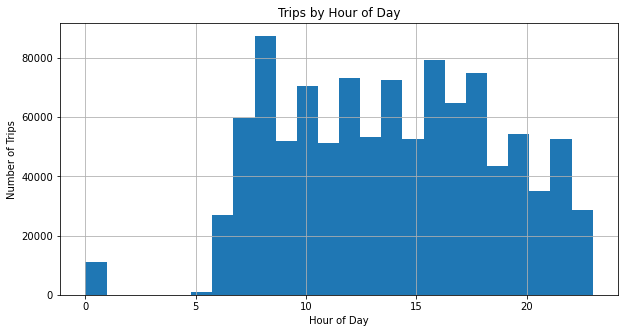

In [54]:
tripWeather['hour'] = tripWeather['hour'].astype('int64')

tripWeather.hour.hist(figsize=(10,5), bins=24)
plt.title('Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')

Text(0, 0.5, 'Number of Trips')

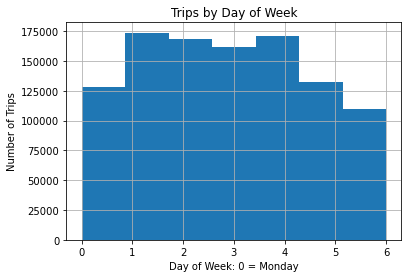

In [52]:
tripWeather.dayOfWeek.hist(bins=7)
plt.title('Trips by Day of Week')
plt.xlabel('Day of Week: 0 = Monday')
plt.ylabel('Number of Trips')

## Adding Late/Early Columns

In [32]:
# Arrival Differences
tripWeather['arrival_diff'] = tripWeather['ACTUALTIME_ARR'] - tripWeather['PLANNEDTIME_ARR']
tripWeather.head()

,DATASOURCE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,...,weather_icon,date,time,month,day,year,hour,minute,dayOfWeek,arrival_diff
0,DB,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,...,02n,2/7/2018,0:00,2,7,2018,0,00,2,279.0
1,DB,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,...,02n,2/7/2018,7:00,2,7,2018,7,00,2,2235.0
2,DB,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,...,04d,2/7/2018,9:00,2,7,2018,9,00,2,817.0
3,DB,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,...,09d,2/7/2018,15:00,2,7,2018,15,00,2,1202.0
4,DB,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,...,09n,2/7/2018,23:00,2,7,2018,23,00,2,-701.0


In [33]:
# Departure Differences
tripWeather['departure_diff'] = tripWeather['ACTUALTIME_DEP'] - tripWeather['PLANNEDTIME_DEP']
tripWeather.head()

,DATASOURCE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,...,date,time,month,day,year,hour,minute,dayOfWeek,arrival_diff,departure_diff
0,DB,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,...,2/7/2018,0:00,2,7,2018,0,00,2,279.0,0.0
1,DB,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,...,2/7/2018,7:00,2,7,2018,7,00,2,2235.0,0.0
2,DB,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,...,2/7/2018,9:00,2,7,2018,9,00,2,817.0,-18.0
3,DB,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,...,2/7/2018,15:00,2,7,2018,15,00,2,1202.0,23.0
4,DB,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,...,2/7/2018,23:00,2,7,2018,23,00,2,-701.0,8.0


In [34]:
# Planned Duration
tripWeather['planned_duration'] = tripWeather['PLANNEDTIME_ARR'] - tripWeather['PLANNEDTIME_DEP']
tripWeather.head()

,DATASOURCE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,...,time,month,day,year,hour,minute,dayOfWeek,arrival_diff,departure_diff,planned_duration
0,DB,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,...,0:00,2,7,2018,0,00,2,279.0,0.0,2645
1,DB,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,...,7:00,2,7,2018,7,00,2,2235.0,0.0,4057
2,DB,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,...,9:00,2,7,2018,9,00,2,817.0,-18.0,3412
3,DB,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,...,15:00,2,7,2018,15,00,2,1202.0,23.0,2841
4,DB,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,...,23:00,2,7,2018,23,00,2,-701.0,8.0,3783


In [35]:
# Actual Duration
tripWeather['actual_duration'] = tripWeather['ACTUALTIME_ARR'] - tripWeather['ACTUALTIME_DEP']
tripWeather.head()

,DATASOURCE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,...,month,day,year,hour,minute,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration
0,DB,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,...,2,7,2018,0,00,2,279.0,0.0,2645,2924.0
1,DB,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,...,2,7,2018,7,00,2,2235.0,0.0,4057,6292.0
2,DB,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,...,2,7,2018,9,00,2,817.0,-18.0,3412,4247.0
3,DB,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,...,2,7,2018,15,00,2,1202.0,23.0,2841,4020.0
4,DB,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,...,2,7,2018,23,00,2,-701.0,8.0,3783,3074.0


In [36]:
# Duration Difference
tripWeather['duration_diff'] = tripWeather['actual_duration'] - tripWeather['planned_duration']
tripWeather.head()

,DATASOURCE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,...,day,year,hour,minute,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration,duration_diff
0,DB,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,...,7,2018,0,00,2,279.0,0.0,2645,2924.0,279.0
1,DB,6262138,25B,25B_271,2,30517,26460,32752.0,26460.0,BasDef,...,7,2018,7,00,2,2235.0,0.0,4057,6292.0,2235.0
2,DB,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,...,7,2018,9,00,2,817.0,-18.0,3412,4247.0,835.0
3,DB,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,...,7,2018,15,00,2,1202.0,23.0,2841,4020.0,1179.0
4,DB,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,...,7,2018,23,00,2,-701.0,8.0,3783,3074.0,-709.0


In [37]:
upper_clamp = np.percentile(tripWeather['duration_diff'], 99.85)
upper_clamp

3176.3834999999963

In [38]:
lower_clamp = np.percentile(tripWeather['duration_diff'], 0.15)
lower_clamp

-1538.0

<AxesSubplot:>

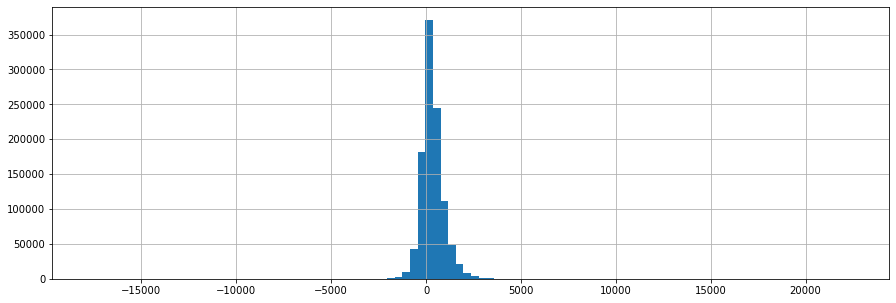

In [39]:
tripWeather.duration_diff.hist(figsize=(15,5), bins=100)

In [40]:
# Drop rows that duration_diff is greater than upper clamp
tripWeather.drop(tripWeather[tripWeather['duration_diff'] > upper_clamp].index, inplace = True)

In [41]:
# Drop rows that duration_diff is less than lower clamp
tripWeather.drop(tripWeather[tripWeather['duration_diff'] < lower_clamp].index, inplace = True)

Text(0, 0.5, 'Number of Trips')

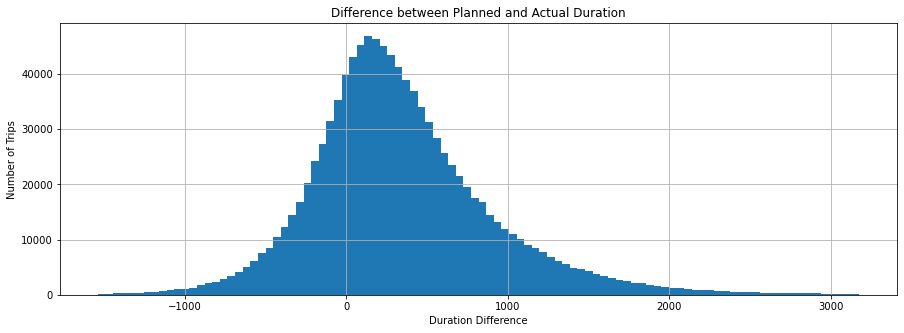

In [51]:
tripWeather.duration_diff.hist(figsize=(15,5), bins=100)
plt.title('Difference between Planned and Actual Duration')
plt.xlabel('Duration Difference')
plt.ylabel('Number of Trips')

In [43]:
tripWeather.shape

(1045270, 59)

<AxesSubplot:title={'center':'arrival_diff'}, xlabel='[hour]'>

<Figure size 432x288 with 0 Axes>

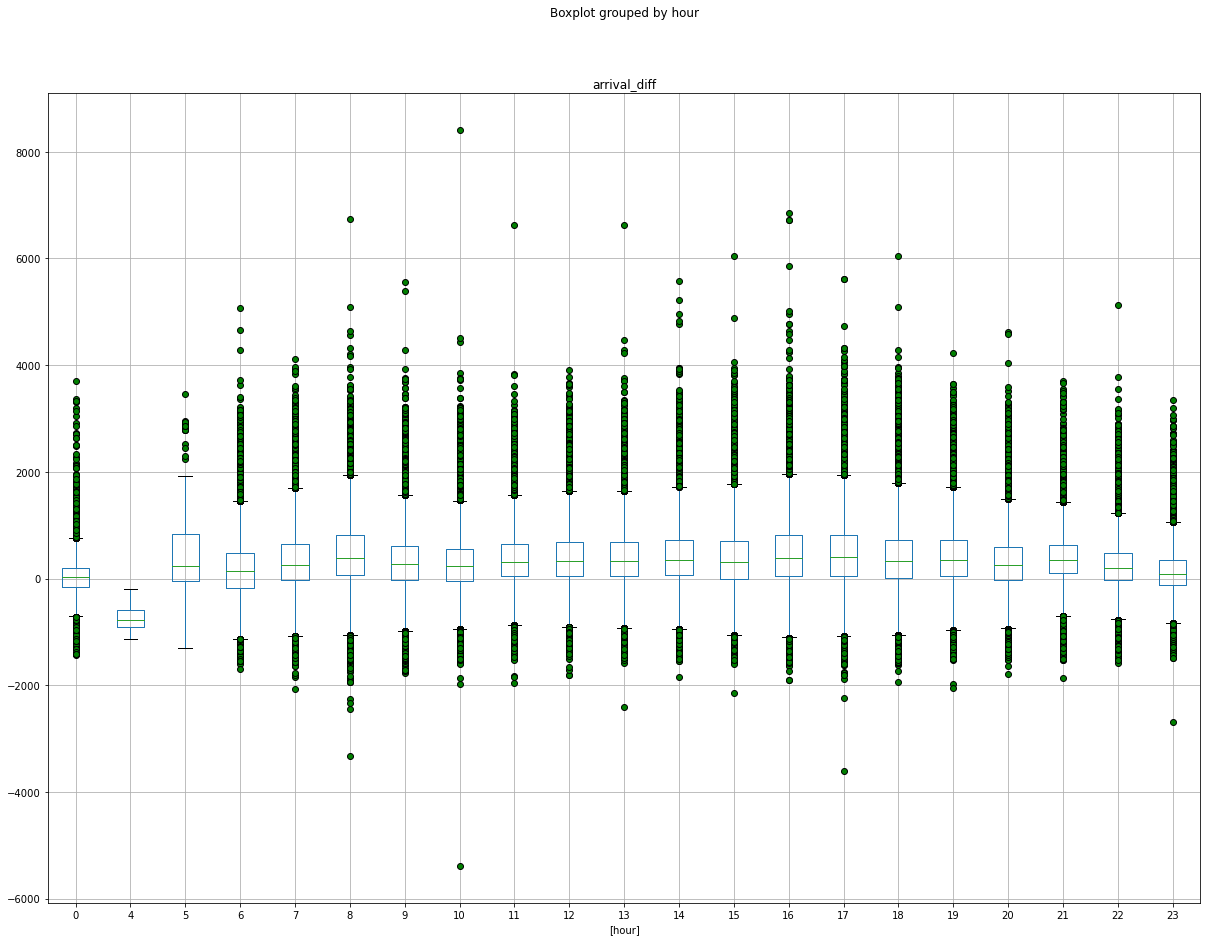

In [55]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
tripWeather.boxplot(column=['arrival_diff'], by=['hour'], flierprops=flierprops, figsize=(20,15))

<AxesSubplot:title={'center':'departure_diff'}, xlabel='[hour]'>

<Figure size 432x288 with 0 Axes>

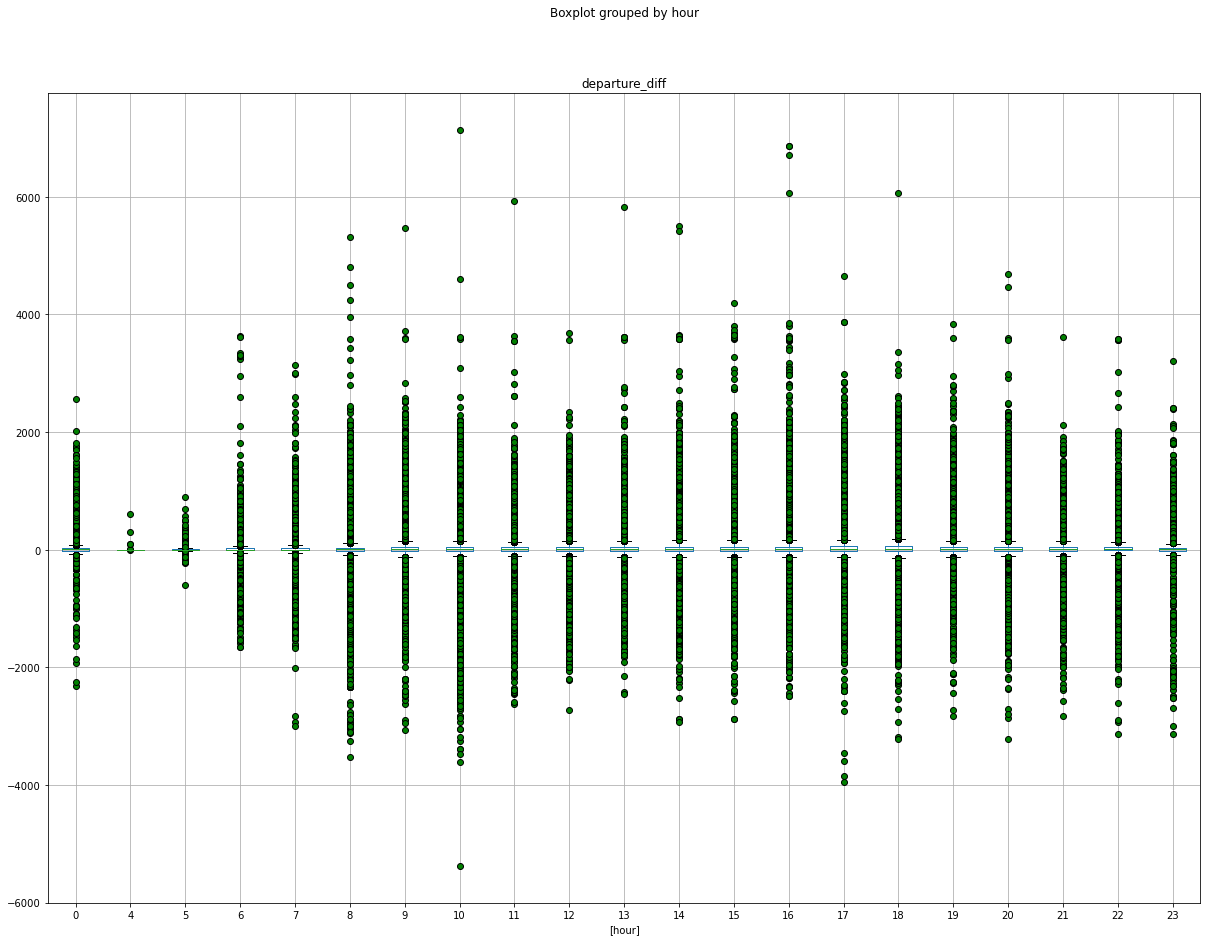

In [56]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
tripWeather.boxplot(column=['departure_diff'], by=['hour'], flierprops=flierprops, figsize=(20,15))

<AxesSubplot:title={'center':'duration_diff'}, xlabel='[hour]'>

<Figure size 432x288 with 0 Axes>

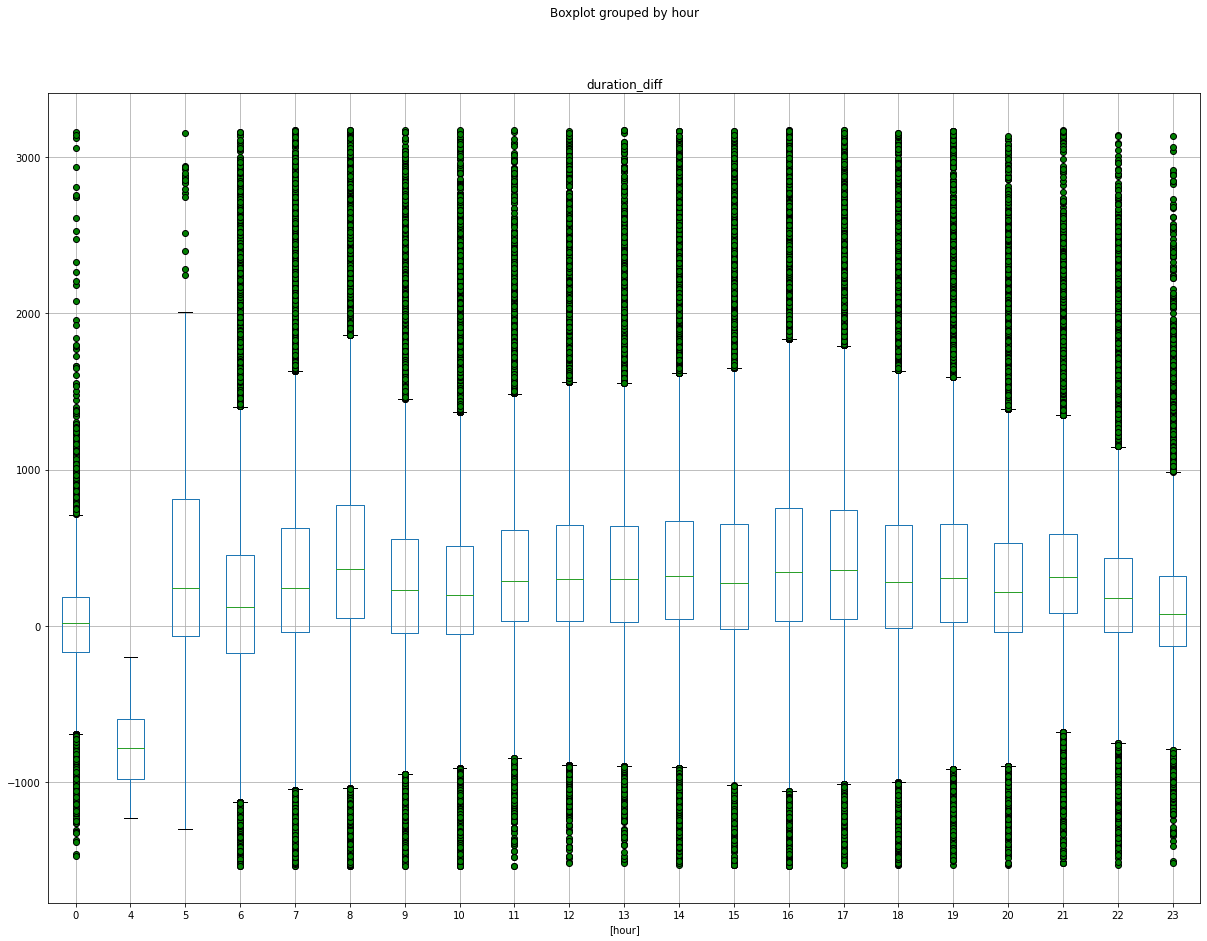

In [57]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
tripWeather.boxplot(column=['duration_diff'], by=['hour'], flierprops=flierprops, figsize=(20,15))

<AxesSubplot:title={'center':'duration_diff'}, xlabel='[dayOfWeek]'>

<Figure size 432x288 with 0 Axes>

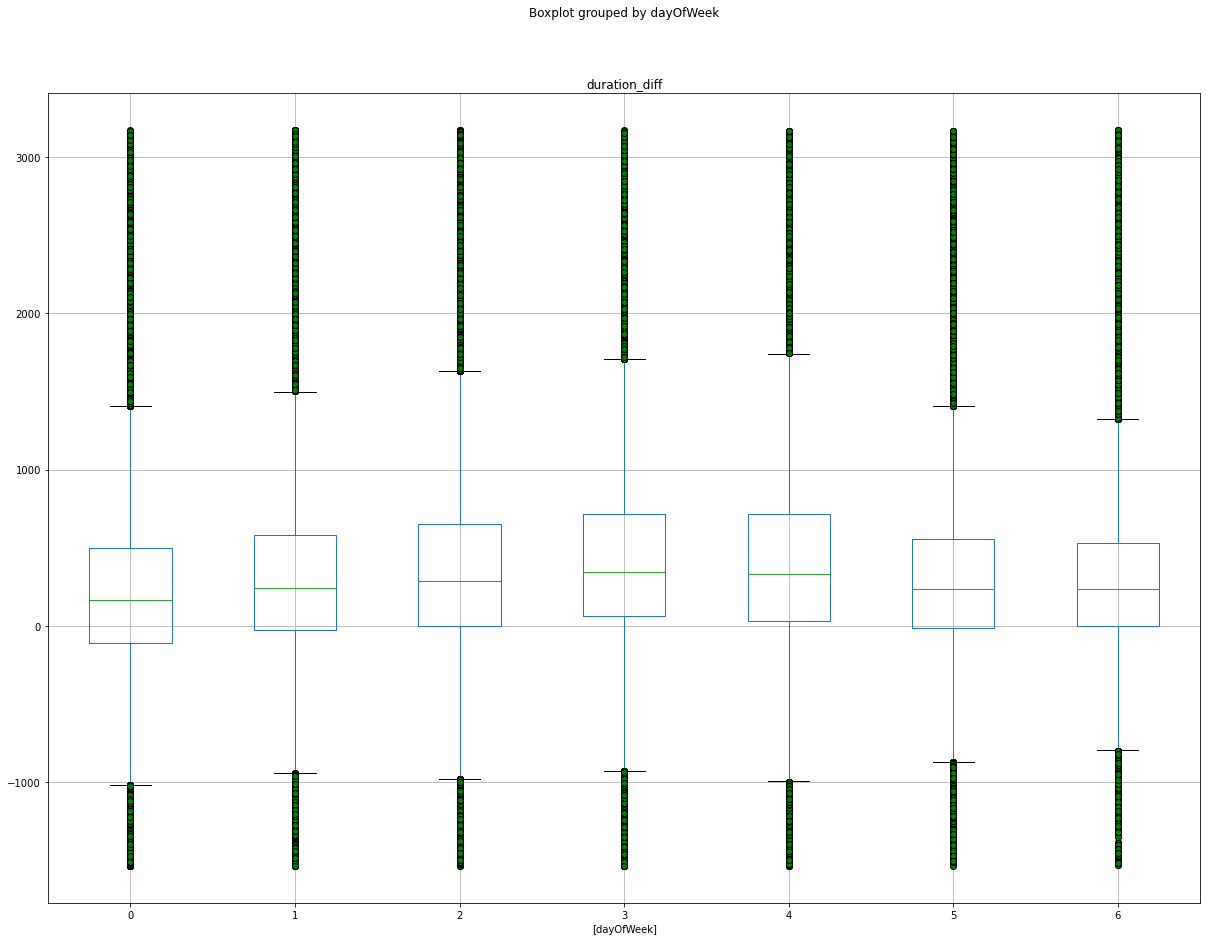

In [58]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
tripWeather.boxplot(column=['duration_diff'], by=['dayOfWeek'], flierprops=flierprops, figsize=(20,15))

In [ ]:
tripWeather.dtypes

In [ ]:
tripWeather.describe().T

In [ ]:
continuous_columns = tripWeather[['arrival_diff', 'departure_diff', 'duration_diff']]
continuous_columns.describe().T